# Preprocessing Data NO2 di Kota Pematangsiantar
## Penanganan Missing Value

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

#### Penjelasan
Kita import terlebih dahulu library yang digunakan. Pendas berfungsi untuk memanipulasi dan analisis data sedangkan mamatplotlib.pyplot berfungsi untuk memvisualisasi data dan grafik

In [16]:
NO2 = pd.read_csv('no2_results/no2_siantar_data.csv')
NO2 = NO2.sort_values(by='date')
NO2

,date,feature_index,NO2
49,2025-06-30T00:00:00.000Z,0,NaN
48,2025-07-01T00:00:00.000Z,0,0.000012
50,2025-07-02T00:00:00.000Z,0,NaN
13,2025-07-03T00:00:00.000Z,0,NaN
15,2025-07-04T00:00:00.000Z,0,0.000028
...,...,...,...
31,2025-09-26T00:00:00.000Z,0,NaN
25,2025-09-27T00:00:00.000Z,0,NaN
30,2025-09-28T00:00:00.000Z,0,0.000008
52,2025-09-29T00:00:00.000Z,0,NaN


#### Penjelasan
Bagian ini berfungsi mengambil data hasil pemrosesan satelit yang sebelumnya sudah disimpan di disk, lalu memuatnya ke dalam format tabel yang kuat (Pandas DataFrame), memastikan urutan kronologisnya benar, dan menampilkannya untuk pemeriksaan awal.

In [17]:
NO2.isnull().sum()

,0
date,0
feature_index,0
NO2,51


Langkah diatas dilakukan untuk menghitung jumlah missing values pada setiap kolom untuk mengidentifikasi tingkat kelengkapan data

/tmp/ipython-input-800750193.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 0.5, f"{v} ({missing_percent[i]:.1f}%)",


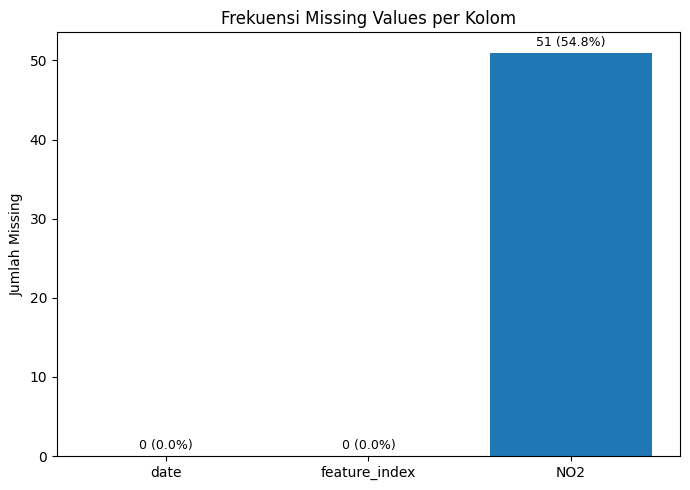

,Missing Count,Missing Percent (%)
date,0,0.00
feature_index,0,0.00
NO2,51,54.84


In [18]:
missing_count = NO2.isnull().sum()
missing_percent = (missing_count / len(NO2)) * 100

fig, ax = plt.subplots(figsize=(7,5))

bars = ax.bar(missing_count.index, missing_count)

ax.set_title("Frekuensi Missing Values per Kolom")
ax.set_ylabel("Jumlah Missing")

for i, v in enumerate(missing_count):
    ax.text(i, v + 0.5, f"{v} ({missing_percent[i]:.1f}%)",
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

missing_table = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percent (%)': missing_percent.round(2)
})

missing_table

#### Penjelasan
Kode diatas berfungsi memvisualisasikan missing values dalam bentuk bar chart lalu menampilkan jumlah serta presentase missing values di atas setiap bar yang ditampilkan dan membuat tabel summary missing values untuk didokumentasi

In [19]:
NO2 = pd.Series(NO2['NO2'].values, index=NO2['date'], name='NO2')
NO2 = NO2.interpolate(method='linear').bfill()
NO2 = pd.DataFrame(NO2).reset_index()
NO2

,date,NO2
0,2025-06-30T00:00:00.000Z,0.000012
1,2025-07-01T00:00:00.000Z,0.000012
2,2025-07-02T00:00:00.000Z,0.000018
3,2025-07-03T00:00:00.000Z,0.000023
4,2025-07-04T00:00:00.000Z,0.000028
...,...,...
88,2025-09-26T00:00:00.000Z,0.000009
89,2025-09-27T00:00:00.000Z,0.000008
90,2025-09-28T00:00:00.000Z,0.000008
91,2025-09-29T00:00:00.000Z,0.000008


#### Penjelasan
Code ini berfungsi Mengubah data tabel (DataFrame) menjadi struktur deret waktu (Series) yang terindeks tanggal lalu mengisi missing values data menggunakan teknik interpolasi dan backfill, diakhiri dengan mengembalikan data ke format tabel (DataFrame) untuk kemudahan analisis dan visualisasi. Metode ini mempertahankan pola temporal data.

In [20]:
NO2.isnull().sum()

,0
date,0
NO2,0


Langkah diatas bertujuan memverifikasi bahwa semua missing values telah berhasil ditangani setelah proses interpolasi dan backward fill.

In [21]:
missing_count = NO2.isnull().sum()
missing_percent = (missing_count / len(NO2)) * 100

missing_table = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percent (%)': missing_percent.round(2)
})

missing_table

,Missing Count,Missing Percent (%)
date,0,0.0
NO2,0,0.0


Code diatas berfungsi membuat tabel summary atau rangkuman untuk mendokumentasikan bahwa tidak ada lagi missing values setelah proses imputasi.

In [22]:
NO2 = NO2.drop(columns='date')
NO2 = pd.DataFrame(NO2)
NO2

,NO2
0,0.000012
1,0.000012
2,0.000018
3,0.000023
4,0.000028
...,...
88,0.000009
89,0.000008
90,0.000008
91,0.000008


#### Penjelasan
Code ini berfungsi menghapus kolom 'date' karena tidak diperlukan untuk modeling time series lalu memastikan bahwa data berada dalam format data frame yang bersih dan memfokuskan data pada nilai NO2 sebagau lanjutan proses supervised learning

## Membentuk data supervised

In [23]:
day1 = NO2
day2 = NO2
day3 = NO2
day4 = NO2
day5 = NO2

langkah ini berfungsi membuat 5 copy dari dataset untuk membuat versi lag features 1 sampai 5 hari. Pada setiap dataset akan dilakukan eksperimen dengan jumlah lag yang berbeda

### Membuat data supervised menggunakan t1


In [24]:
n_lags = 1
for i in range(1, n_lags + 1):
    day1[f't-{i}'] = day1['NO2'].shift(i)

day1 = day1.dropna().reset_index(drop=True)
day1.to_csv('no2_results/day1_supervised.csv', index=False)
day1

,NO2,t-1
0,0.000012,0.000012
1,0.000018,0.000012
2,0.000023,0.000018
3,0.000028,0.000023
4,0.000020,0.000028
...,...,...
87,0.000009,0.000009
88,0.000008,0.000009
89,0.000008,0.000008
90,0.000008,0.000008


### Membuat data supervised menggunakan t1, t2

In [25]:
n_lags = 2
for i in range(1, n_lags + 1):
    day2[f't-{i}'] = day2['NO2'].shift(i)

day2 = day2.dropna().reset_index(drop=True)
day2.to_csv('no2_results/day2_supervised.csv', index=False)
day2

,NO2,t-1,t-2
0,0.000018,0.000012,0.000012
1,0.000023,0.000018,0.000012
2,0.000028,0.000023,0.000018
3,0.000020,0.000028,0.000023
4,0.000011,0.000020,0.000028
...,...,...,...
86,0.000009,0.000009,0.000009
87,0.000008,0.000009,0.000009
88,0.000008,0.000008,0.000009
89,0.000008,0.000008,0.000008


### Membuat data supervised menggunakan t1, t2, t3

In [26]:
n_lags = 3
for i in range(1, n_lags + 1):
    day3[f't-{i}'] = day3['NO2'].shift(i)

day3 = day3.dropna().reset_index(drop=True)
day3.to_csv('no2_results/day3_supervised.csv', index=False)
day3

,NO2,t-1,t-2,t-3
0,0.000023,0.000018,0.000012,0.000012
1,0.000028,0.000023,0.000018,0.000012
2,0.000020,0.000028,0.000023,0.000018
3,0.000011,0.000020,0.000028,0.000023
4,0.000024,0.000011,0.000020,0.000028
...,...,...,...,...
85,0.000009,0.000009,0.000009,0.000010
86,0.000008,0.000009,0.000009,0.000009
87,0.000008,0.000008,0.000009,0.000009
88,0.000008,0.000008,0.000008,0.000009


### Membuat data supervised menggunakan t1, t2, t3, t4

In [27]:
n_lags = 4
for i in range(1, n_lags + 1):
    day4[f't-{i}'] = day4['NO2'].shift(i)

day4 = day4.dropna().reset_index(drop=True)
day4.to_csv('no2_results/day4_supervised.csv', index=False)
day4

,NO2,t-1,t-2,t-3,t-4
0,0.000028,0.000023,0.000018,0.000012,0.000012
1,0.000020,0.000028,0.000023,0.000018,0.000012
2,0.000011,0.000020,0.000028,0.000023,0.000018
3,0.000024,0.000011,0.000020,0.000028,0.000023
4,0.000018,0.000024,0.000011,0.000020,0.000028
...,...,...,...,...,...
84,0.000009,0.000009,0.000009,0.000010,0.000014
85,0.000008,0.000009,0.000009,0.000009,0.000010
86,0.000008,0.000008,0.000009,0.000009,0.000009
87,0.000008,0.000008,0.000008,0.000009,0.000009


### Membuat data supervised menggunakan t1, t2, t3, t4, t5

In [28]:
n_lags = 5
for i in range(1, n_lags + 1):
    day5[f't-{i}'] = day5['NO2'].shift(i)

day5 = day5.dropna().reset_index(drop=True)
day5.to_csv('no2_results/day5_supervised.csv', index=False)
day5

,NO2,t-1,t-2,t-3,t-4,t-5
0,0.000020,0.000028,0.000023,0.000018,0.000012,0.000012
1,0.000011,0.000020,0.000028,0.000023,0.000018,0.000012
2,0.000024,0.000011,0.000020,0.000028,0.000023,0.000018
3,0.000018,0.000024,0.000011,0.000020,0.000028,0.000023
4,0.000013,0.000018,0.000024,0.000011,0.000020,0.000028
...,...,...,...,...,...,...
83,0.000009,0.000009,0.000009,0.000010,0.000014,0.000018
84,0.000008,0.000009,0.000009,0.000009,0.000010,0.000014
85,0.000008,0.000008,0.000009,0.000009,0.000009,0.000010
86,0.000008,0.000008,0.000008,0.000009,0.000009,0.000009
